In [1]:
%matplotlib notebook
import numpy as np
import matplotlib
from matplotlib import pyplot as plt
import pandas as pd

df=pd.read_table('./data/pressure.txt',sep='\s',header=0, engine='python')

df.head()

,Xi,Y1
0,80000,3.0033
1,82500,3.4949
2,85000,3.9882
3,87500,4.4937
4,90000,5.0049


<IPython.core.display.Javascript object>


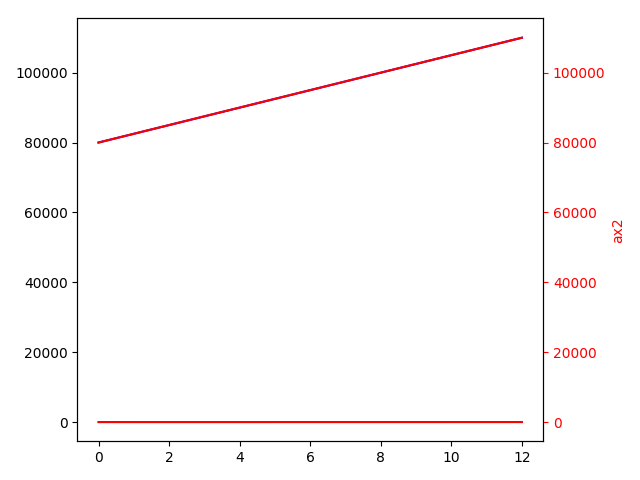

In [92]:


fig, ax1 = plt.subplots()
ax1.plot(df.Xi, 'b')
ax1.plot(df.Y1, 'y')

#ax1.set_xlabel('time (s)')
# Make the y-axis label, ticks and tick labels match the line color.

ax2 = ax1.twinx()
ax2.plot(df.Xi, 'r')
ax2.plot(df.Y1, 'r')

ax2.set_ylabel('ax2', color='r')
ax2.tick_params('y', colors='r')

fig.tight_layout()


<IPython.core.display.Javascript object>


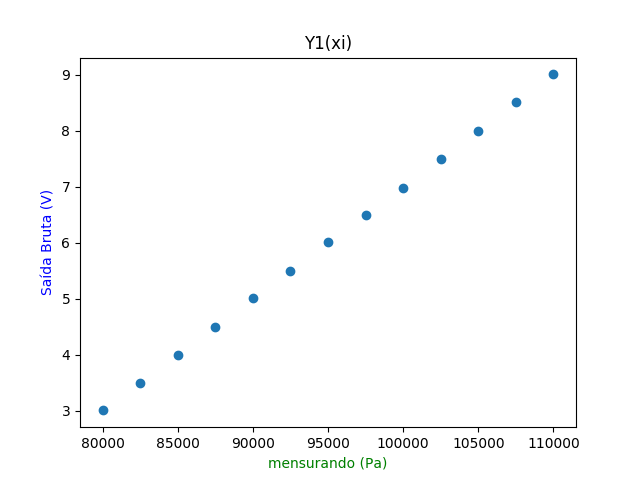

In [93]:
fig, ax1 = plt.subplots()
ax1.set_title('Y1(xi)')
ax1.set_ylabel('Saída Bruta (V)', color='b')
ax1.set_xlabel('mensurando (Pa)', color='g')

plt.plot(df.Xi,df.Y1,'o')
plt.show()

### Método dos Mínimos Quadrados

\\( D = N\sum{Y^{2}} - (\sum{Y})^2 \\)

\\( c_{0} = (\sum{X}\sum{Y^2}\,-\,\sum{Y}\sum{XY}) / D \\)

\\( c_{1} = (N\sum{XY}\,-\,\sum{X}\sum{Y}) / D \\)



In [3]:
#N = 13
N = df.Y1.size 
D = N * sum(df.Y1**2) - sum(df.Y1)**2
#592.08848258 print(D)
c0 = ( (sum(df.Xi) * sum(df.Y1**2)) - (sum(df.Y1)  * sum(df.Xi * df.Y1)) ) / D
c1 = ( (N * sum(df.Xi * df.Y1) - (sum(df.Xi) * sum(df.Y1))) ) / D
print(' N = %s \n D = %s \n c0 = %s Pa \n c1 = %s Pa/V' % (N,D,c0,c1))

 N = 13 
 D = 592.08848258 
 c0 = 65029.8793476 Pa 
 c1 = 4997.46758644 Pa/V


In [95]:
df['X1'] = c0+c1*df.Y1       # Saída calibrada
df['erro'] = df.X1 - df.Xi   # Estimatíva de erro

In [96]:
print(df)

        Xi      Y1             X1       erro
0    80000  3.0033   80038.773750  38.773750
1    82500  3.4949   82495.528815  -4.471185
2    85000  3.9882   84960.779576 -39.220424
3    87500  4.4937   87486.999441 -13.000559
4    90000  5.0049   90041.704871  41.704871
5    92500  5.5004   92517.950060  17.950060
6    95000  6.0055   95042.170938  42.170938
7    97500  6.4839   97432.959431 -67.040569
8   100000  6.9801   99912.702848 -87.297152
9   102500  7.5008  102514.884220  14.884220
10  105000  7.9971  104995.127383  -4.872617
11  107500  8.5061  107538.838385  38.838385
12  110000  9.0029  110021.580282  21.580282


In [102]:
# Viés (bias)
vies = df.erro.mean()
erro2 = (df.erro**2).mean()

desvio_padrao = np.sqrt( sum((df.erro - vies)**2)/(N-1) )

print(" Bias/viés = %s # ~0,0 Pa \n Imprecisão = %s # Pa \n Inacurácia = %s ± %s Pa" % (vies,desvio_padrao,vies,desvio_padrao))


 Bias/viés = -5.59689047245e-11 # ~0,0 Pa 
 Imprecisão = 42.234644186 #Pa 
 Inacurácia = -5.59689047245e-11 ± 42.234644186 Pa


## Resumo
---
### Equação de Transferência : (serve para achar a reta de ajuste)
\\( \hat{Y_1} = a_0 - a_1 Y_1 \\)

### Equação de Calibração :
\\( X_1 = c_0 - c_1 Y_1 \\)


# Correção de exercício Cap 03 - Exercício 14
---
